In [1]:
pip install gymnasium

In [2]:
from time import sleep
import numpy as np
from IPython.display import clear_output
import gymnasium as gym
from gymnasium.envs.registration import register
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt

In [3]:
#Give colab access to your google drive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%cd /gdrive/MyDrive/CSCI181V/

/gdrive/MyDrive/CSCI181V


In [5]:
#Import MiniPacMan environment class definition
from MiniPacManGym import MiniPacManEnv

In [6]:
#Register MiniPacMan in your gymnasium environments
register(
    id="MiniPacMan-v0",
    entry_point=MiniPacManEnv,
    max_episode_steps=20
)

In [7]:
#Create a MiniPacMan gymnasium environment
env = gym.make("MiniPacMan-v0", render_mode="human", frozen_ghost=False)

In [8]:
# Model Architecture

class PolicyNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.linear1=nn.Linear(36,32)
      self.linear2=nn.Linear(32,16)
      self.linear3=nn.Linear(16,4)

    def forward(self, x):
      x=nn.Flatten()(x)
      x=self.linear1(x)
      x=nn.ReLU()(x)
      x=self.linear2(x)
      x=nn.ReLU()(x)
      x=self.linear3(x)
      x=nn.Softmax(dim=1)(x)
      return x


In [10]:
pi=PolicyNetwork()

In [11]:
pi_optimizer = torch.optim.Adam(pi.parameters(), lr=0.01)

In [12]:
#set hyperparams
gamma=0.95
num_updates=200
num_trajectories=200
win_log=[]

for e in range(num_updates):
  B=[] #Buffer for trajectories
  wins=0


  for j in range(num_trajectories):
    new_obs,info=env.reset()
    new_obs=torch.tensor(new_obs,dtype=torch.float32)

    done=False
    truncated=False
    #T=[] #buffer for each trajectory
    log_probs=torch.tensor([])
    rewards=torch.tensor([])

    while not done and not truncated: #Loop for one episode
      obs=new_obs
      probs=pi(obs.reshape(1,-1))
      action=probs.multinomial(num_samples=1)
      action_prob=probs[0,action]#[0]
      log_prob=torch.log(action_prob)
      log_probs=torch.cat((log_probs,log_prob.reshape(1)))

      new_obs,reward, done, truncated, info=env.step(action)
      new_obs=torch.tensor(new_obs,dtype=torch.float32)
      #T.append((log_prob,reward))
      rewards=torch.cat((rewards,torch.tensor(reward).reshape(1)))

    #n=len(T)
    #log_probs,rewards=zip(*T)
    #log_probs=torch.cat(log_probs)

    #rewards=torch.tensor(rewards)
    discounts = torch.pow(gamma, torch.arange(rewards.shape[0], dtype=torch.float32))
    rewards_to_go = torch.flip(torch.cumsum(torch.flip(rewards * discounts, dims=[0]), dim=0), dims=[0]) / discounts
    #rewards_to_go = (rewards_to_go - rewards_to_go.mean())

    B.append(log_probs*rewards_to_go)
    wins+=(reward==10)

  B=torch.cat(B)
  loss=-B.mean()
  pi_optimizer.zero_grad()
  loss.backward()
  pi_optimizer.step()

  #periodic reporting:
  if e>0 and e%1==0:
    win_pct=wins/num_trajectories
    win_log+=[win_pct]
    print(f'episode: {e}, loss: {loss:.2f}, win percentage: {win_pct}')


episode: 1, loss: -12.90, win percentage: 0.0
episode: 2, loss: -12.41, win percentage: 0.01
episode: 3, loss: -11.74, win percentage: 0.015
episode: 4, loss: -12.77, win percentage: 0.005
episode: 5, loss: -12.35, win percentage: 0.01
episode: 6, loss: -12.57, win percentage: 0.005
episode: 7, loss: -12.55, win percentage: 0.005
episode: 8, loss: -12.53, win percentage: 0.005
episode: 9, loss: -12.26, win percentage: 0.01
episode: 10, loss: -12.31, win percentage: 0.0
episode: 11, loss: -10.64, win percentage: 0.03
episode: 12, loss: -11.57, win percentage: 0.015
episode: 13, loss: -10.43, win percentage: 0.03
episode: 14, loss: -10.71, win percentage: 0.02
episode: 15, loss: -10.44, win percentage: 0.02
episode: 16, loss: -9.73, win percentage: 0.035
episode: 17, loss: -9.46, win percentage: 0.03
episode: 18, loss: -7.37, win percentage: 0.055
episode: 19, loss: -8.22, win percentage: 0.03
episode: 20, loss: -9.29, win percentage: 0.01
episode: 21, loss: -8.47, win percentage: 0.035


Update 1/100 - Loss: -4.2742
Update 2/100 - Loss: -3.4862
Update 3/100 - Loss: -1.8962
Update 4/100 - Loss: -0.9116
Update 5/100 - Loss: 0.1862
Update 6/100 - Loss: 1.0931
Update 7/100 - Loss: 2.3910
Update 8/100 - Loss: 2.4224
Update 9/100 - Loss: 1.6144
Update 10/100 - Loss: 2.1311
Update 11/100 - Loss: 1.5236
Update 12/100 - Loss: 1.4906
Update 13/100 - Loss: 0.7983
Update 14/100 - Loss: 0.4529
Update 15/100 - Loss: 0.2750
Update 16/100 - Loss: 0.1980
Update 17/100 - Loss: 0.0286
Update 18/100 - Loss: 0.2751
Update 19/100 - Loss: 0.0197
Update 20/100 - Loss: 0.1620
Update 21/100 - Loss: 0.0057
Update 22/100 - Loss: 0.2197
Update 23/100 - Loss: 0.0023
Update 24/100 - Loss: 0.0021
Update 25/100 - Loss: 0.0019
Update 26/100 - Loss: 0.0016
Update 27/100 - Loss: 0.0014
Update 28/100 - Loss: 0.0011
Update 29/100 - Loss: 0.0009
Update 30/100 - Loss: 0.1265
Update 31/100 - Loss: 0.0010
Update 32/100 - Loss: 0.0013
Update 33/100 - Loss: 0.0016
Update 34/100 - Loss: 0.0019
Update 35/100 - Los

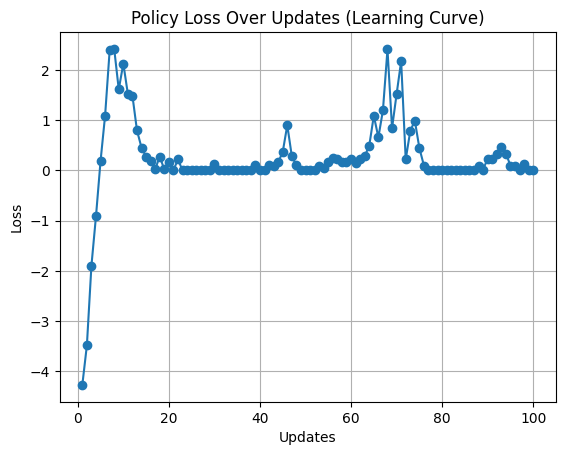

In [ ]:
import torch
import matplotlib.pyplot as plt

losses = []  # Store loss values

for e in range(M):  # M updates
    batch_log_probs = []
    batch_rewards = []

    for j in range(N):  # N trajectories
        state, _ = env.reset()
        state = state.flatten()  # Ensure the input is 1D

        trajectory = []
        done = False

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Ensure correct shape
            action_probs = policy_net(state_tensor)

            action = torch.multinomial(action_probs.squeeze(0), 1).item()

            next_state, reward, terminated, truncated, _ = env.step(action)
            next_state = next_state.flatten()  # Flatten next state as well
            done = terminated or truncated

            trajectory.append((torch.log(action_probs[0, action]), reward))
            state = next_state

        # Compute rewards-to-go for trajectory (REINFORCE update)
        rewards_to_go = []
        R = 0
        for _, reward in reversed(trajectory):
            R = reward + gamma * R
            rewards_to_go.insert(0, R)  # Store rewards-to-go from last to first

        # Store log probabilities and rewards-to-go
        for (log_prob, _), R in zip(trajectory, rewards_to_go):
            batch_log_probs.append(log_prob)
            batch_rewards.append(R)

    # Compute policy loss
    batch_log_probs = torch.stack(batch_log_probs)
    batch_rewards = torch.tensor(batch_rewards, dtype=torch.float32)
    loss = -torch.mean(batch_log_probs * batch_rewards)  # REINFORCE loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss for plotting
    losses.append(loss.item())

    # Print progress
    print(f"Update {e+1}/{M} - Loss: {loss.item():.4f}")

# Function to plot learning curve
def plot_learning_curve(losses):
    plt.plot(range(1, M+1), losses, marker='o', linestyle='-')
    plt.xlabel("Updates")
    plt.ylabel("Loss")
    plt.title("Policy Loss Over Updates (Learning Curve)")
    plt.grid()
    plt.show()

# Plot loss curve after training
plot_learning_curve(losses)

env.close()


ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

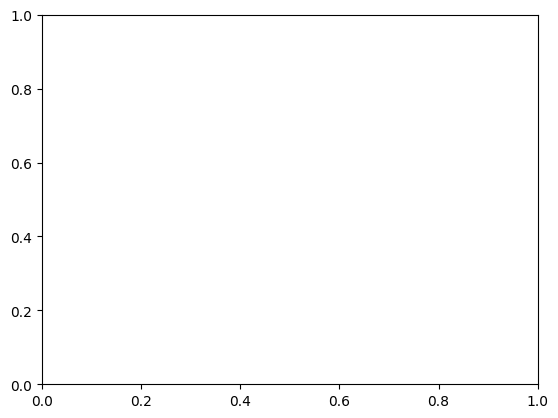

In [ ]:
# Plot win percentage over time
plt.plot(range(1, M+1), win_percentages, marker='o', linestyle='-')
plt.xlabel("Updates")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Updates")
plt.grid()
plt.show()

env.close()


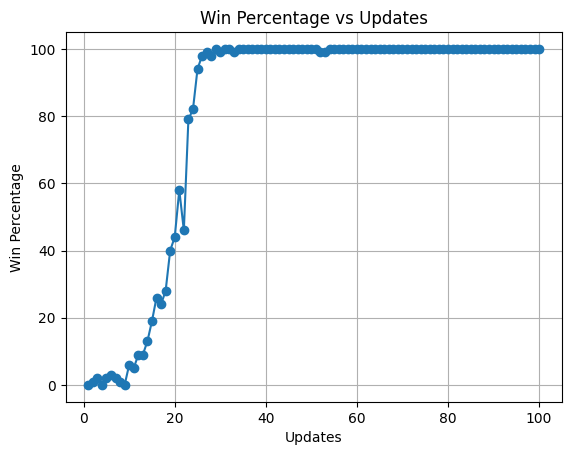

In [ ]:
plt.plot(range(1, M+1), win_percentages, marker='o', linestyle='-')
plt.xlabel("Updates")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Updates")
plt.grid()
plt.show()

env.close()

In [ ]:
obs, info = env.reset()
done = False
truncated = False

while not done and not truncated:
    env.render()
    obs=torch.tensor(obs.flatten(),dtype=torch.float32)
    action= torch.argmax(policy_net(obs)).item()
    obs, reward, done, truncated, info = env.step(action)
    sleep(1)
    clear_output(wait=True)

env.render()
env.close()

xxxxxx
x····x
x··ᗣ·x
x····x
x···ᗧx
xxxxxx

